In [ ]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
tain = pd.read_csv('TAINWALCHM.csv')
tain.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-01,12.7,12.7,12.7,12.7,12.7,0
1,2014-01-02,13.3,13.3,13.3,13.3,13.3,200
2,2014-01-03,13.3,13.3,13.3,13.3,13.3,0
3,2014-01-06,13.3,13.3,13.3,13.3,13.3,0
4,2014-01-07,13.3,13.3,13.3,13.3,13.3,0


# KNN


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
train_data = tain[:int(len(tain)*0.75)]
test_data = tain[int(len(tain)*0.75):]

X_train = train_data[['Open', 'Low', 'High']]
y_train = train_data[['Date', 'Close']]

X_test = test_data[['Open', 'Low', 'High']]
y_test = test_data[['Date', 'Close']]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Khởi tạo mô hình KNN Regressor
knn = KNeighborsRegressor()

# Định nghĩa các tham số cần tìm kiếm
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'leaf_size': [1, 5, 10, 15, 20]
}

# Sử dụng GridSearchCV để tìm kiếm tham số tốt nhất
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train['Close'])

# Lấy mô hình tốt nhất
best_knn = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_) #Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}

# Dự đoán giá trị Close từ tập kiểm tra
y_pred = best_knn.predict(X_test_scaled)

# Đánh giá mô hình
mse = mean_squared_error(y_test['Close'], y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test['Close'], y_pred)
print(f'R-squared: {r2}')


Root Mean Squared Error: 4.839169140246545
R-squared: 0.9309228998100725


C:\Users\Pisco\AppData\Local\Temp\ipykernel_23608\3224050537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Date'] = pd.to_datetime(y_test['Date'])
C:\Users\Pisco\AppData\Local\Temp\ipykernel_23608\3224050537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Predicted_Close'] = y_pred


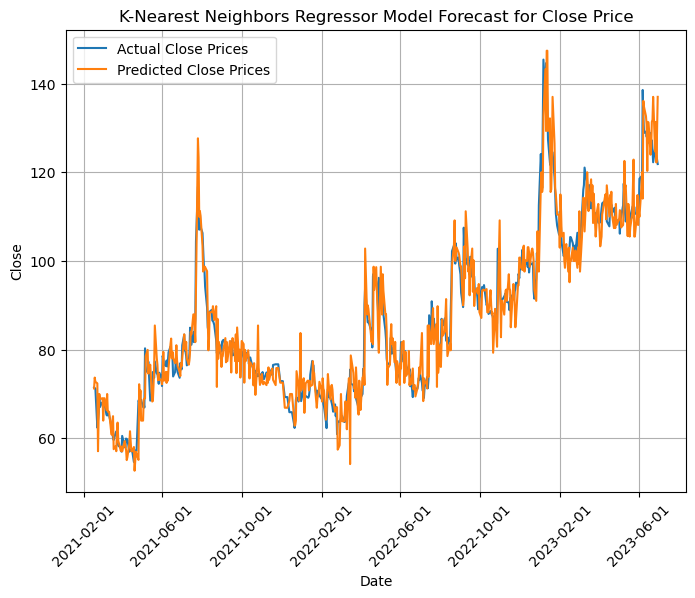

In [ ]:
# Convert Date to datetime format
y_test['Date'] = pd.to_datetime(y_test['Date'])

# Add the 'Predicted_Close' column to y_test
y_test['Predicted_Close'] = y_pred

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the actual and predicted close prices
plt.plot(y_test['Date'], y_test['Close'], label='Actual Close Prices')
plt.plot(y_test['Date'], y_test['Predicted_Close'], label='Predicted Close Prices')

# Set title and labels
plt.title('K-Nearest Neighbors Regressor Model Forecast for Close Price')
plt.xlabel('Date')
plt.ylabel('Close')

# Format x-axis to show every two months
plt.xticks(pd.date_range(start=y_test['Date'].min(), end=y_test['Date'].max(), freq='4M').strftime('%Y-%m'), rotation=45)

# Add grid and legend
plt.legend()
plt.grid()

# Show plot
plt.show()


# MLPR


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
train_data = tain[:int(len(tain)*0.75)]
test_data = tain[int(len(tain)*0.75):]

X_train = train_data[['Open', 'High', 'Low']]
y_train = train_data[['Date', 'Close']]

X_test = test_data[['Open', 'High', 'Low']]
y_test = test_data[['Date', 'Close']]


In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create the MLP Regressor model
mlp = MLPRegressor(hidden_layer_sizes=(47, 47), max_iter=49, random_state=42)  

# Fit the model
mlp.fit(X_train_scaled, y_train['Close'])

# Predict using the model
y_pred = mlp.predict(X_test_scaled)

c:\Users\Pisco\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (49) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Đánh giá mô hình
mse = mean_squared_error(y_test['Close'], y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test['Close'], y_pred)
print(f'R-squared: {r2}')

Root Mean Squared Error: 3.537796236200739
R-squared: 0.9630803032602939


C:\Users\Pisco\AppData\Local\Temp\ipykernel_39504\2052235222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Date'] = pd.to_datetime(y_test['Date'])
C:\Users\Pisco\AppData\Local\Temp\ipykernel_39504\2052235222.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Predicted_Close'] = y_pred


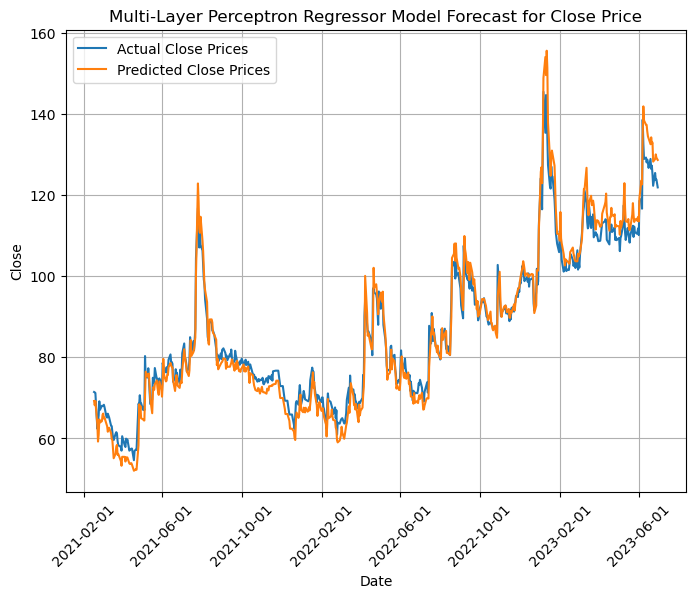

In [ ]:
# Convert Date to datetime format
y_test['Date'] = pd.to_datetime(y_test['Date'])

# Add the 'Predicted_Close' column to y_test
y_test['Predicted_Close'] = y_pred

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the actual and predicted close prices
plt.plot(y_test['Date'], y_test['Close'], label='Actual Close Prices')
plt.plot(y_test['Date'], y_test['Predicted_Close'], label='Predicted Close Prices')

# Set title and labels
plt.title('Multi-Layer Perceptron Regressor Model Forecast for Close Price')
plt.xlabel('Date')
plt.ylabel('Close')

# Format x-axis to show every two months
plt.xticks(pd.date_range(start=y_test['Date'].min(), end=y_test['Date'].max(), freq='4M').strftime('%Y-%m'), rotation=45)

# Add grid and legend
plt.legend()
plt.grid()

# Show plot
plt.show()


# LSTM


In [ ]:
train_data = tain[:int(len(tain)*0.75)]
test_data = tain[int(len(tain)*0.75):]

X_train = train_data[['Open', 'Low']]
y_train = train_data[['Date', 'Close']]

X_test = test_data[['Open', 'Low']]
y_test = test_data[['Date', 'Close']]

In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, time steps, features]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [ ]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(25, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(tf.keras.layers.Dropout(0.2))
model.add(LSTM(25))
# model.add(tf.keras.layers.Dropout(0.3))
model.add(Dense(4))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_train_scaled, y_train['Close'], epochs=32, batch_size=32, verbose=1)

# Predict using the model
y_pred = model.predict(X_test_scaled)

# Đánh giá mô hình
mse = mean_squared_error(y_test['Close'], y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test['Close'], y_pred)
print(f'R-squared: {r2}')


c:\Users\Pisco\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/32
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 3791.3306
Epoch 2/32
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3586.3030
Epoch 3/32
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3142.5220
Epoch 4/32
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2472.9534
Epoch 5/32
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1665.5199
Epoch 6/32
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 901.7351
Epoch 7/32
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 510.5554
Epoch 8/32
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 410.6844
Epoch 9/32
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 268.6263
Epoch 10/32
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 250.3533
Epoch 11/32
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 220.5963
Epoch 12/32
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 169.0561
Epoch 13/32
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 148.3016
Epoch 14/32
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 116.9222
Epoch 15/32
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

C:\Users\Pisco\AppData\Local\Temp\ipykernel_47392\424880701.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Date'] = pd.to_datetime(y_test['Date'])
C:\Users\Pisco\AppData\Local\Temp\ipykernel_47392\424880701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Date'] = pd.to_datetime(y_train['Date'])
C:\Users\Pisco\AppData\Local\Temp\ipykernel_47392\424880701.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

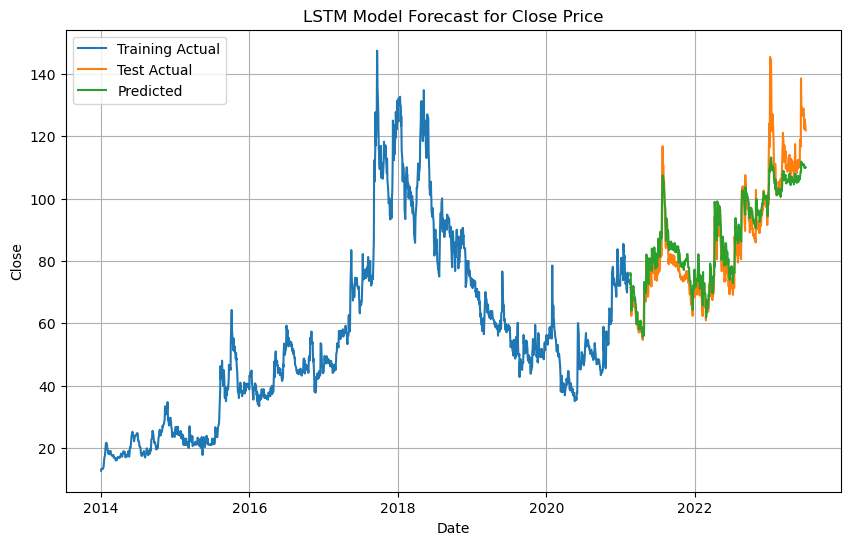

In [ ]:
from matplotlib.dates import DateFormatter, YearLocator

# Convert Date to datetime format
y_test['Date'] = pd.to_datetime(y_test['Date'])
y_train['Date'] = pd.to_datetime(y_train['Date'])

# Add the 'Predicted_Close' column to y_test
y_test['Predicted_Close'] = y_pred

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the actual and predicted close prices
plt.plot(y_train['Date'], y_train['Close'], label='Training Actual')
plt.plot(y_test['Date'], y_test['Close'], label='Test Actual')
plt.plot(y_test['Date'], y_test['Predicted_Close'], label='Predicted')

# Set title and labels
plt.title('LSTM Model Forecast for Close Price')
plt.xlabel('Date')
plt.ylabel('Close')

# Format x-axis to show every 2 years
plt.gca().xaxis.set_major_locator(YearLocator(2))
date_form = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_form)

# Add grid and legend
plt.legend()
plt.grid()

# Show plot
plt.show()


# SVR


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
train_data = tain[:int(len(tain)*0.75)]
test_data = tain[int(len(tain)*0.75):]

X_train = train_data[['Open', 'High', 'Low', 'Volume']]
y_train = train_data[['Date', 'Close']]

X_test = test_data[['Open', 'High', 'Low', 'Volume']]
y_test = test_data[['Date', 'Close']]

In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'C': [10, 100, 1000], 
              'gamma': [0.1, 0.01, 0.001],
              'epsilon': [0.01, 0.1, 1]}

# Create the SVR model
svr = SVR(kernel='rbf')

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error') # You might want to change scoring based on your needs
grid_search.fit(X_train_scaled, y_train['Close'])

# Get the best model and its parameters
best_svr = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_) #Best Hyperparameters: {'C': 1000, 'epsilon': 0.01, 'gamma': 0.01}

# Predict using the best model
y_pred = best_svr.predict(X_test_scaled)

In [ ]:
# Đánh giá mô hình
mse = mean_squared_error(y_test['Close'], y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test['Close'], y_pred)
print(f'R-squared: {r2}')


Root Mean Squared Error: 4.926636899135865
R-squared: 0.9284032012518709


C:\Users\Pisco\AppData\Local\Temp\ipykernel_21020\2864107125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Date'] = pd.to_datetime(y_test['Date'])
C:\Users\Pisco\AppData\Local\Temp\ipykernel_21020\2864107125.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Predicted_Close'] = y_pred


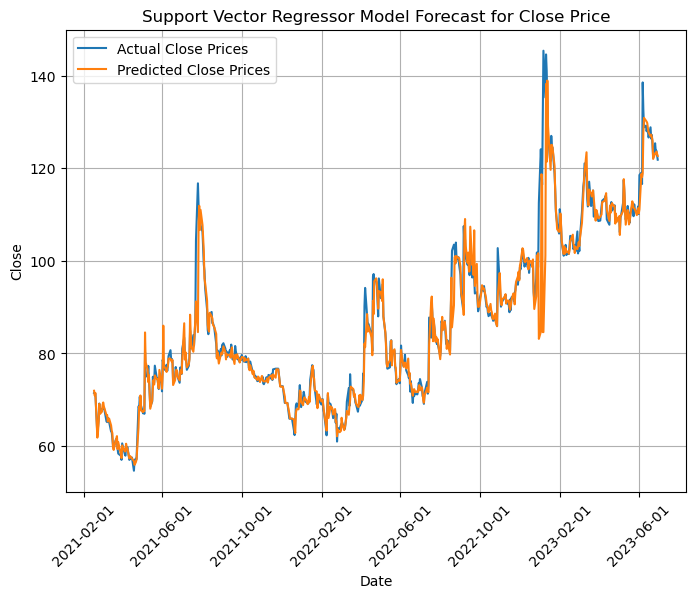

In [ ]:
# Convert Date to datetime format
y_test['Date'] = pd.to_datetime(y_test['Date'])

# Add the 'Predicted_Close' column to y_test
y_test['Predicted_Close'] = y_pred

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the actual and predicted close prices
plt.plot(y_test['Date'], y_test['Close'], label='Actual Close Prices')
plt.plot(y_test['Date'], y_test['Predicted_Close'], label='Predicted Close Prices')

# Set title and labels
plt.title('Support Vector Regressor Model Forecast for Close Price')
plt.xlabel('Date')
plt.ylabel('Close')

# Format x-axis to show every two months
plt.xticks(pd.date_range(start=y_test['Date'].min(), end=y_test['Date'].max(), freq='4M').strftime('%Y-%m'), rotation=45)

# Add grid and legend
plt.legend()
plt.grid()

# Show plot
plt.show()
